In [6]:
import pandas as pd
import numpy as np

In [7]:
dataset = pd.read_csv('Accommodation_Reviews.csv')

In [84]:
dataset.shape

(515738, 17)

In [8]:
dataset.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [85]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [86]:
dataset.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


In [18]:
dataset['Hotel_Name'].nunique()

1492

In [11]:
#As we can see, there are 1492 hotels. Some hotels have only 43 comments, while some have over 16 000. 
#to guarantee that all the hotels get into training set I used Stratified Split.

In [12]:
#dropping non informative columns
dataset.drop(columns = ['lng', 'lat', 'days_since_review', 'Reviewer_Nationality', 'Review_Date', 'Additional_Number_of_Scoring', 'Hotel_Address'], inplace = True)

In [17]:
dataset.head()

,Average_Score,Hotel_Name,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags
0,7.7,Hotel Arena,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
1,7.7,Hotel Arena,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
2,7.7,Hotel Arena,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre..."
3,7.7,Hotel Arena,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex..."
4,7.7,Hotel Arena,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St..."


In [16]:
for i in range(10):
    print(dataset.Tags.values[i])

[' Leisure trip ', ' Couple ', ' Duplex Double Room ', ' Stayed 6 nights ']
[' Leisure trip ', ' Couple ', ' Duplex Double Room ', ' Stayed 4 nights ']
[' Leisure trip ', ' Family with young children ', ' Duplex Double Room ', ' Stayed 3 nights ', ' Submitted from a mobile device ']
[' Leisure trip ', ' Solo traveler ', ' Duplex Double Room ', ' Stayed 3 nights ']
[' Leisure trip ', ' Couple ', ' Suite ', ' Stayed 2 nights ', ' Submitted from a mobile device ']
[' Leisure trip ', ' Group ', ' Duplex Double Room ', ' Stayed 1 night ']
[' Leisure trip ', ' Group ', ' Duplex Twin Room ', ' Stayed 5 nights ', ' Submitted from a mobile device ']
[' Leisure trip ', ' Couple ', ' Duplex Double Room ', ' Stayed 2 nights ', ' Submitted from a mobile device ']
[' Leisure trip ', ' Couple ', ' Duplex Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']
[' Leisure trip ', ' Couple ', ' Large King Room ', ' Stayed 7 nights ']


In [ ]:
#As we can see, tags do not give any useful information about hotels
#The only useful varaibles for hotel recommendation are the two reviews and avergae hotel score

In [20]:
#we can treat the problem as classifiaction where each hotel is a separate label.
#That is doable but compliacted. One way to simplyfy it is to cluster hotels and recommend particular
#clusters of hotels. I will implement both and compare accuracies

In [52]:
X_good = dataset.Positive_Review.values
X_bad = dataset.Negative_Review.values

y = dataset.Hotel_Name.values

In [53]:
#I don't need the whole dataset to uderstand which approach is the best.
#I split it into 40 equal batches to train on one and test on amother one.
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=40)

X_good_ = list()
X_bad_ = list()
y_ = list()

for train_index, test_index in skf.split(X_good, y):
    X_good_.append(X_good[test_index])
    X_bad_.append(X_bad[test_index])
    y_.append(y[test_index])

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=40.
  warnings.warn(


In [54]:
X_train_good = X_good_[0]
X_test_good = X_good_[1]
X_train_bad = X_bad_[0]
X_test_bad = X_bad_[1]
y_train = y_[0]
y_test = y_[1]

In [55]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
#vectorization of the reviews
def embedding(X):
    X = X.tolist()
    X = [x.lower() for x in X]
    corpus = []
    nltk.download('stopwords')
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    for i in range(0, len(X)):
        review = X[i]
        review = review.split()
        ps = PorterStemmer()
        review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
        review = ' '.join(review)
        corpus.append(review)
    cv = CountVectorizer(max_features = 1500)
    cv.fit(corpus)
    return cv

In [56]:
vectorizor_good = embedding(X_train_good)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nikita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
X_train_good = vectorizor_good.transform(X_train_good).toarray()

In [58]:
X_train_good[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
#I will measure the performace of the model by counting how often it will 
#recommend the hotel among 100 proposed as the most probable
def recom_score(predictor, X_test, y_test):
    X_test = X_test[:1000]
    y_test = y_test[:1000]
    success = 0
    for i in range(len(y_test)):
        y_pred = predictor.predict_proba([X_test[i]])
        y_pred_sorted = np.argsort(y_pred)
        top_100 = predictor.classes_[y_pred_sorted][0][-100:]
        if (y_test[i] in top_100):
            success+=1
    return success/len(y_test)

In [60]:
from sklearn.naive_bayes import GaussianNB
gaus = GaussianNB()
gaus.fit(X_train_good, y_train)

GaussianNB()

In [61]:
X_test_good = vectorizor_good.transform(X_test_good).toarray()

In [62]:
recom_score(gaus, X_test_good, y_test)

0.122

In [63]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100, max_depth = 10)
forest.fit(X_train_good, y_train)

RandomForestClassifier(max_depth=10)

In [64]:
recom_score(forest, X_test_good, y_test)

0.542

In [65]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_good, y_train)

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
recom_score(log_reg, X_test_good, y_test)

0.482

In [ ]:
#the best score we could get with 1492 label clustering is 0.542. Let's try clustering

In [ ]:
## Clustering

In [68]:
#first, we need to decide on optimal number of clusters. It will take too much time to calculate
#Silhouette score(I tried), so I will go with interia criterion (i.e. elbow method)
from sklearn.cluster import KMeans
wcss = []

for i in range(5, 80, 5):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X_train_good)
    wcss.append(kmeans.inertia_)

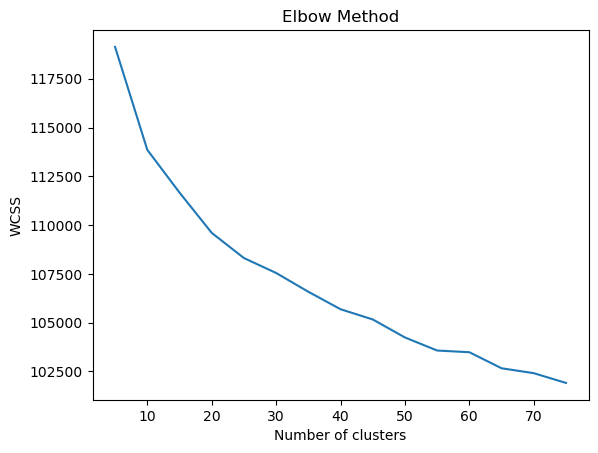

In [70]:
import matplotlib.pyplot as plt
plt.plot(range(5, 80, 5), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [71]:
#there is no clear "elbow" something like this is at point 55, let's try it
kmeans = KMeans(n_clusters = 55, random_state = 42)
kmeans.fit(X_train_good)

KMeans(n_clusters=55, random_state=42)

In [72]:
labels = kmeans.labels_

In [73]:
clusters = np.empty([55, ], dtype = 'object')

In [74]:
for i in range(55):
    clusters[i] = set()

In [76]:
for i in range(len(y_train)):
    clusters[labels[i]].add(y_train[i])

In [77]:
lens = list()
for i in clusters:
    lens.append(len(i))
print(np.array(lens))

[195 110   1 128 100  65  65 145 373 373 141 236  17 386  10 344 157  47
  81 103 201 279 312 827 149 527  51 158  50 330 203  65 115   1   1 100
 245 269   1   1  62 223   5   1   3 115   1 266 419  25 210   1   2 282
 228]


In [78]:
y_train_cluster = kmeans.predict(X_train_good)

In [79]:
log_reg_clust = LogisticRegression()
log_reg_clust.fit(X_train_good, y_train_cluster)

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
y_pred = log_reg_clust.predict(X_test_good)

In [85]:
y_pred_clust = [clusters[i] for i in y_pred]

In [87]:
success = 0
for i in range(len(y_pred_clust)):
    if (y_test[i] in y_pred_clust[i]):
        success+=1
print(success/len(y_test))

0.5100046533271289


In [103]:
#the result seems better than without clustering. But here clusters are very uneven.
#as we saw some clusters have 1 hotel, while others over 400. The model could just predict 
#the cluster with 800 and get the same result. Let's try to increase the number of clusters

In [94]:
kmeans_2 = KMeans(n_clusters = 150, random_state = 42)
kmeans_2.fit(X_train_good)

KMeans(n_clusters=150, random_state=42)

In [95]:
clusters_2 = np.empty([150, ], dtype = 'object')
labels_2 = kmeans_2.labels_
for i in range(150):
    clusters_2[i] = set()
for i in range(len(y_train)):
    clusters_2[labels_2[i]].add(y_train[i])
lens_2 = list()
for i in clusters_2:
    lens_2.append(len(i))
print(np.array(lens_2))

[  1  90  59  34   9   7  76  74   7 303  39 739  81  23   4 108  14   1
  60  28  48   1   6 327  60  12  86   1  23   3   6  65 171   1  85   1
  84  73  13   1  18 112 107  24   1   6  86   6   1  64 144   6  11 294
  89  13  41  40  45   1   1   1   1 112   1  16   1   2  43   1   2   1
  95  62   1  88 190   1 174 224   1  21  86   1   1 157   1   1   1 260
 195 233   1   1 408   1  52   1   1 254  55   1  86   1  42 123   6 128
  99 234   1 295   1 252 228  12   1 152  97   5   1   1 189   1 341   1
   1  84  27 230   1  91   1   1  17   1   2   1   1   1  53   1   1 125
   1   1  27   2   1 119]


In [ ]:
#As we can see, distribution is still uneven, and some clusters have way too many hotels, while some
#have only one, so in reality applying clustering is not a way to go
#In this file I explored the proble. In "problem_solution.ipynb" file I built the model.  